# Handwritten Equation Solver Using CNN
## by- Tamal Majumder
* **[LINKEDIN](https://www.linkedin.com/in/tamal-majumder-4979781a3/)**
* **[GITHUB](https://github.com/t-majumder)**
* The Download Link of teh Dataset **[Dataset Link](https://www.kaggle.com/datasets/xainano/handwrittenmathsymbols)**

### Steps Taken: 
* Import the libraries
* Loading Input Images From Folder
* Assigning The Data into Different groups
* Saving the data
* Preprocessing the Data
* Training The Data
* Then Building the CNN model
### Testing: 
* In the Testing section we first wrote an equation clicked its image, cropped it and imported it as test image
* Then using our CNN model we solved the equation and got a accurate result.

In [ ]:
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline
import os
from os import listdir
from os.path import isfile, join
import pandas as pd

### Loading Input Images From Folder

In [83]:
def load_images_from_folder(folder):
    train_data=[]
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
        img=~img
        if img is not None:
            ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)

            ctrs,ret=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
            cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
            w=int(28)
            h=int(28)
            maxi=0
            for c in cnt:
                x,y,w,h=cv2.boundingRect(c)
                maxi=max(w*h,maxi)
                if maxi==w*h:
                    x_max=x
                    y_max=y
                    w_max=w
                    h_max=h
            im_crop= thresh[y_max:y_max+h_max+10, x_max:x_max+w_max+10]
            im_resize = cv2.resize(im_crop,(28,28))
            im_resize=np.reshape(im_resize,(784,1))
            train_data.append(im_resize)
    return train_data

In [84]:
data=[]

### Assigning The Data into Different groups

In [85]:
# Assign '-' = 10
data=load_images_from_folder('C:\\Users\\987ta\\Downloads\\archive (19)\\data\\extracted_images\\-')
len(data)
for i in range(0,len(data)):
    data[i]=np.append(data[i],['10'])
    
print(len(data))

33997


In [86]:
# Assign + = 11
data11=load_images_from_folder('C:\\Users\\987ta\\Downloads\\archive (19)\\data\\extracted_images\\+')

for i in range(0,len(data11)):
    data11[i]=np.append(data11[i],['11'])
data=np.concatenate((data,data11))
print(len(data))

59109


In [87]:
data0=load_images_from_folder('C:\\Users\\987ta\\Downloads\\archive (19)\\data\\extracted_images\\0')

for i in range(0,len(data0)):
    data0[i]=np.append(data0[i],['0'])
data=np.concatenate((data,data0))
print(len(data))

66023


In [88]:
data1=load_images_from_folder('C:\\Users\\987ta\\Downloads\\archive (19)\\data\\extracted_images\\1')

for i in range(0,len(data1)):
    data1[i]=np.append(data1[i],['1'])
data=np.concatenate((data,data1))
print(len(data))

92543


In [89]:
data2=load_images_from_folder('C:\\Users\\987ta\\Downloads\\archive (19)\\data\\extracted_images\\2')

for i in range(0,len(data2)):
    data2[i]=np.append(data2[i],['2'])
data=np.concatenate((data,data2))
print(len(data))

118684


In [90]:
data3=load_images_from_folder('C:\\Users\\987ta\\Downloads\\archive (19)\\data\\extracted_images\\3')

for i in range(0,len(data3)):
    data3[i]=np.append(data3[i],['3'])
data=np.concatenate((data,data3))
print(len(data))

129593


In [91]:
data4=load_images_from_folder('C:\\Users\\987ta\\Downloads\\archive (19)\\data\\extracted_images\\4')

for i in range(0,len(data4)):
    data4[i]=np.append(data4[i],['4'])
data=np.concatenate((data,data4))
print(len(data))

136989


In [92]:
data5=load_images_from_folder('C:\\Users\\987ta\\Downloads\\archive (19)\\data\\extracted_images\\5')

for i in range(0,len(data5)):
    data5[i]=np.append(data5[i],['5'])
data=np.concatenate((data,data5))
print(len(data))

140534


In [93]:
data6=load_images_from_folder('C:\\Users\\987ta\\Downloads\\archive (19)\\data\\extracted_images\\6')

for i in range(0,len(data6)):
    data6[i]=np.append(data6[i],['6'])
data=np.concatenate((data,data6))
print(len(data))

143652


In [94]:
data7=load_images_from_folder('C:\\Users\\987ta\\Downloads\\archive (19)\\data\\extracted_images\\7')

for i in range(0,len(data7)):
    data7[i]=np.append(data7[i],['7'])
data=np.concatenate((data,data7))
print(len(data))

146561


In [95]:
data8=load_images_from_folder('C:\\Users\\987ta\\Downloads\\archive (19)\\data\\extracted_images\\8')

for i in range(0,len(data8)):
    data8[i]=np.append(data8[i],['8'])
data=np.concatenate((data,data8))
print(len(data))

149629


In [96]:
data9=load_images_from_folder('C:\\Users\\987ta\\Downloads\\archive (19)\\data\\extracted_images\\9')

for i in range(0,len(data9)):
    data9[i]=np.append(data9[i],['9'])
data=np.concatenate((data,data9))
print(len(data))

153366


In [97]:
data12=load_images_from_folder('C:\\Users\\987ta\\Downloads\\archive (19)\\data\\extracted_images\\times')

for i in range(0,len(data12)):
    data12[i]=np.append(data12[i],['12'])
data=np.concatenate((data,data12))
print(len(data))

156617


### Saving the data

In [98]:
df=pd.DataFrame(data,index=None)
df.to_csv('train_final.csv',index=False)

### Preprocessing

In [99]:
# Importing Libraries
import pandas as pd
import numpy as np
import pickle

In [100]:
df_train=pd.read_csv('train_final.csv',index_col=False)
labels=df_train[['784']]

In [101]:
df_train.drop(df_train.columns[[784]],axis=1,inplace=True)
df_train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
3,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
4,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,255,255,...,0,0,0,0,0,0,0,0,0,0
9,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0


### Training The Data

In [102]:
np.random.seed(1212)
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.image_data_format()

'channels_last'

In [103]:
labels=np.array(labels)

In [104]:
from keras.utils.np_utils import to_categorical
cat=to_categorical(labels,num_classes=13)

In [105]:
print(cat[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [106]:
df_train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
3,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
4,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,255,255,...,0,0,0,0,0,0,0,0,0,0
9,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0


In [107]:
df_train.shape

(156617, 784)

In [108]:
temp=df_train.to_numpy()

In [109]:
X_train = temp.reshape(temp.shape[0], 28, 28, 1)

In [110]:
temp.shape[0]

156617

In [111]:
X_train.shape

(156617, 28, 28, 1)

In [112]:
l=[]
for i in range(50621):
    l.append(np.array(df_train[i:i+1]).reshape(1,28,28))

In [113]:
np.random.seed(7)

In [114]:
X_train.shape

(156617, 28, 28, 1)

# Building the CNN model

In [115]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28,1), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(13, activation='softmax'))

In [116]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [117]:
from keras.models import model_from_json

In [118]:
model.fit(X_train, cat, epochs=10, batch_size=200,shuffle=True,verbose=1)

Epoch 1/10
784/784 [==============================] - 14s 17ms/step - loss: 0.3569 - accuracy: 0.9145
Epoch 2/10
784/784 [==============================] - 13s 17ms/step - loss: 0.0629 - accuracy: 0.9823
Epoch 3/10
784/784 [==============================] - 14s 17ms/step - loss: 0.0390 - accuracy: 0.9889
Epoch 4/10
784/784 [==============================] - 13s 16ms/step - loss: 0.0297 - accuracy: 0.9913
Epoch 5/10
784/784 [==============================] - 14s 18ms/step - loss: 0.0254 - accuracy: 0.9923
Epoch 6/10
784/784 [==============================] - 13s 17ms/step - loss: 0.0215 - accuracy: 0.9933
Epoch 7/10
784/784 [==============================] - 13s 17ms/step - loss: 0.0174 - accuracy: 0.9948
Epoch 8/10
784/784 [==============================] - 13s 16ms/step - loss: 0.0168 - accuracy: 0.9950
Epoch 9/10
784/784 [==============================] - 13s 17ms/step - loss: 0.0147 - accuracy: 0.9956
Epoch 10/10
784/784 [==============================] - 13s 17ms/step - loss: 0.013

In [119]:
model_json = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_final.h5")

In [148]:
import cv2
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
# K.set_image_dim_ordering('th')
from keras.models import model_from_json

In [149]:
json_file = open('model_final.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_final.h5")

### Loading the image for testing

In [178]:
import cv2
import numpy as np
img = cv2.imread('D:\\Data science and ml projects\\9. Handwritten equation solver\\test.jpg',cv2.IMREAD_GRAYSCALE)
img

array([[199, 200, 200, ..., 202, 203, 203],
       [193, 193, 194, ..., 200, 201, 202],
       [195, 195, 194, ..., 198, 199, 200],
       ...,
       [196, 196, 196, ..., 201, 201, 201],
       [197, 197, 197, ..., 201, 201, 202],
       [197, 197, 197, ..., 201, 202, 202]], dtype=uint8)

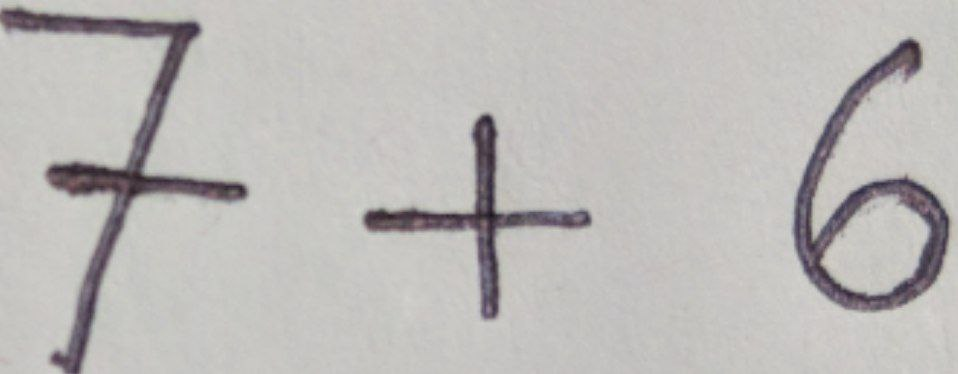

In [179]:
from IPython import display
display.Image("D:\\Data science and ml projects\\9. Handwritten equation solver\\test.jpg",width=250)

In [180]:
if img is not None:
    #images.append(img)
    img=~img
    ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ctrs,ret=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w=int(28)
    h=int(28)
    train_data=[]
    print(len(cnt))
    rects=[]
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    print(rects)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    print(bool_rect)
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i])
    print(len(dump_rect)) 
    final_rect=[i for i in rects if i not in dump_rect]
    print(final_rect)
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]
        

        im_resize = cv2.resize(im_crop,(28,28))


        im_resize=np.reshape(im_resize,(28,28,1))
        train_data.append(im_resize)

18
[[0, 8, 247, 366], [86, 289, 3, 3], [150, 111, 3, 7], [364, 114, 227, 205], [414, 223, 5, 3], [487, 306, 4, 7], [574, 216, 8, 4], [794, 39, 155, 271], [806, 252, 3, 4], [819, 190, 113, 107], [820, 243, 4, 3], [820, 149, 7, 8], [835, 295, 3, 4], [840, 116, 4, 6], [919, 286, 3, 3], [925, 207, 4, 5], [934, 211, 4, 4], [936, 214, 4, 3]]
[[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

### Finally Doing the Arithmatic Operations and showing te result.

In [183]:
import ast
s=''
for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
    result=np.argmax(loaded_model.predict(train_data[i]), axis=-1)
    if(result[0]==10):
        s=s+'-'
    if(result[0]==11):
        s=s+'+'
    if(result[0]==12):
        s=s+'*'
    if(result[0]==0):
        s=s+'0'
    if(result[0]==1):
        s=s+'1'
    if(result[0]==2):
        s=s+'2'
    if(result[0]==3):
        s=s+'3'
    if(result[0]==4):
        s=s+'4'
    if(result[0]==5):
        s=s+'5'
    if(result[0]==6):
        s=s+'6'
    if(result[0]==7):
        s=s+'7'
    if(result[0]==8):
        s=s+'8'
    if(result[0]==9):
        s=s+'9'
    
print('\nThe Output is:',eval(s))

1/1 [==============================] - 0s 19ms/step

The Output is: 13
